In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
section = gpd.read_file('map/section/section.shp')
floorPlan = pd.read_excel('Permanent-Halls_FINAL_floors-sections.xls')

In [6]:
floorPlan = floorPlan.dropna(subset=['Section'])
floorPlan.Section = floorPlan.Section.apply(lambda x: str(x))

In [11]:
df = floorPlan.loc[:,['Date of Source', 'Floor', 'Section', 'Hall Name']]
df['Hall Name'] = df['Hall Name'].apply(str)
df2 = df.groupby(['Date of Source', 'Floor', 'Section'])['Hall Name'].apply(list)
df2.to_csv('df22.csv')
df4 = pd.read_csv('df22.csv',header=None)
df4.columns=['year', 'floor', 'section', 'hall name']

In [105]:
df4.section = df4.section.replace('CCP', '7a')
df4.section = df4.section.replace('SC', '2')
df4.section = df4.section.replace('NC', '7a')

In [112]:
df4['hall name'].to_csv('hall.csv')

In [122]:
js = []
for i in xrange(df4.shape[0]):
    d = {}
    d['year'] = df4.loc[i,'year']
    d['floor'] = df4.loc[i, 'floor']
    d['section'] = df4.loc[i,'section']
    d['hall name'] = df4['hall name'][i]
    js.append(d)

In [126]:
import json
with open('data.json', 'w') as outfile:
    json.dump(js, outfile)

In [139]:
df4.section = df4.section.replace('12a', '12A')
df4.section = df4.section.replace('7a', '7A')
df4.section = df4.section.replace('2a', '2A')
df4.section = df4.section.replace('13a', '13A')

In [137]:
section.section = section.section.apply(str)

In [144]:
section2 = section.loc[:,['geometry', 'section']]
merge = pd.merge(right = section2,left= df4, on = 'section', how='inner' )
merge.to_csv('merge.csv')
merge_geo = gpd.GeoDataFrame(merge)
merge_geo.crs = {"init": "epsg:4326"}
merge_geo.to_file('merge')

In [358]:
merge_geo.to_file('merge')

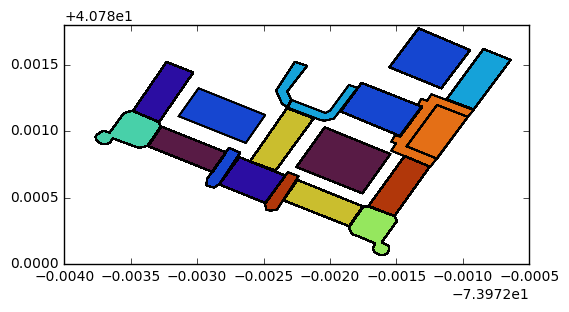

In [359]:
merge_geo.plot()

In [189]:
merge_geo.head(3)

,year,floor,section,hall name,geometry
0,1904,1,1,['Ethnology and Archaeology of Northwest Coast...,"POLYGON ((-73.97460187538796 40.7807749166183,..."
1,1904,2,1,"['Bird Hall', 'Birds']","POLYGON ((-73.97460187538796 40.7807749166183,..."
2,1904,3,1,"['Birds of North America', 'North American Bir...","POLYGON ((-73.97460187538796 40.7807749166183,..."


In [177]:
df_ach = pd.read_csv('map/PH_all_floors.csv')

In [191]:
def change_section(df4):
    df4.section = df4.section.replace('CCP', '7a')
    df4.section = df4.section.replace('SC', '2')
    df4.section = df4.section.replace('NC', '7a')
    df4.section = df4.section.replace('12a', '12A')
    df4.section = df4.section.replace('7a', '7A')
    df4.section = df4.section.replace('2a', '2A')
    df4.section = df4.section.replace('13a', '13A')

In [193]:
change_section(df_ach)

In [242]:
df_ach2 = df_ach[['recordId', 'Names used in AMNH publications', 'useDates', 'floor', 'section']]
df_ach2 = df_ach2.dropna()
df_ach2 = df_ach2.dropna()
df = df.reset_index(drop=True)
df_ach2 = df_ach2.reset_index(drop=True)

In [324]:
merge_geo.to_csv('merge_geo.csv')
df_ach2.to_csv('archive.csv')

In [331]:
df_cut = df_ach.drop_duplicates(subset=['recordId', 'Names used in AMNH publications'])
df_cut = df_cut.iloc[:,[0,4,5,6,7]]
df_cut = df_cut.dropna(subset=['floor', 'section'])
df_cut = df_cut.reset_index(drop=True)
df_cut.to_csv('arc.csv')